# jChess
From PGN to PNG

In [1]:
from src.jchess.data import DataLoader
from src.jchess.data import DataInstance
from src.jchess.visualization import *
from src.jchess.dashboard import *
from src.jchess.expander import *

## Load Data

In [2]:
loader = DataLoader("data/example.pgn")

In [3]:
data_instance = loader.load()

Parsing pgn file data/example.pgn


### Save and load JSON

In [4]:
# data_instance.save("data/example_parsed.json")

In [5]:
# loader = DataLoader("data/example_parsed.json")

In [6]:
# data_instance = loader.load()

## Expand data

In [7]:
try:
    print(data_instance.games[0].annotations["Detected Opening"])
except KeyError:
    print("There is not annotation tag called 'Detected Opening'")

There is not annotation tag called 'Detected Opening'


In [8]:
opening_detector_expander = OpeningDetectorExpander("/home/jaco/Python/ChessStats/data/opening_graph.pickle")

In [9]:
opening_detector_expander.expand(data_instance)

In [10]:
print(data_instance.games[0].annotations["Detected Opening"])

Sicilian Defense: Nimzowitsch Variation


In [11]:
data_instance.save("data/expanded_games.json")

## Dashboard

In [12]:
dashboard = Dashboard(2,2)

### Select data

In [13]:
my_games = data_instance.select_by_username("jChess")

In [14]:
some_games = data_instance.select_by_annotations({"Black": "jChess", "Termination": "Time forfeit"})

### Create visualizations

In [15]:
bw_vis = WinsByColorPie(some_games, "supply a title (opt)")

In [16]:
termination_vis = TerminationMethodPie(my_games)

In [17]:
nmoves = LengthOfGamesHistogram(my_games)

### Add & Export

In [18]:
dashboard.add_visualization(bw_vis)
dashboard.add_visualization(nmoves)

In [19]:
dashboard.add_visualization(termination_vis)

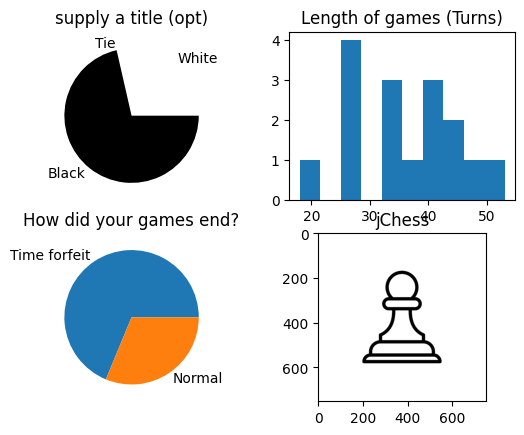

In [20]:
dashboard.export("example.png")